<a href="https://colab.research.google.com/github/btomoda/oncase-desafio/blob/main/oncase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio Cientista de Dados - Oncase

## 1. Análise descritiva dos dados (EDA)

  a. Construa uma análise descritiva extraindo conhecimento das variáveis
  e apresentando quais insights podem ser obtidos a partir delas;

  b. Mostre-nos um caminho para selecionar graficamente as variáveis
  mais ou menos importantes para cada problema, como elas se
  relacionam e porquê.

  c. Como o caminho escolhido para sua EDA suporta a escolha do
  modelo escolhido em cada problema?

  d. Em cada problema descreva quais outras técnicas poderiam ser
  aplicadas e porquê você não as escolheu.

  e. Utilize os dados: eda_data.zip

In [1]:
!pip install hashable-df

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
## Import das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
from hashable_df import hashable_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

### a. Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas

In [4]:
receitas = pd.read_json("receitas.json")

In [5]:
receitas.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [6]:
def Funcao_descritiva(Nome_tabela):

    # Colunas e tipo de coluna
    tabela_aux_tipo = pd.DataFrame(Nome_tabela.dtypes).reset_index()
    tabela_aux_tipo.rename({"index":"Colunas",0:"Tipo"}, axis=1, inplace=True)
    # Contagem de linhas 
    tabela_aux_tipo["Num_linhas"] = Nome_tabela.shape[0]

    # Quantidade de nulls
    tabela_aux_null = pd.DataFrame(hashable_df(Nome_tabela).isnull().sum()).reset_index()
    tabela_aux_null.rename({"index":"Colunas",0:"Qtd_Nulls"}, axis=1, inplace=True)

    # Quantidade da cardinalidade
    tabela_aux_unique = pd.DataFrame(hashable_df(Nome_tabela).nunique()).reset_index()
    tabela_aux_unique.rename({"index":"Colunas",0:"Qtd_Valores_unicos"}, axis=1, inplace=True)

    # Juntar numa base unica 
    tabela_aux_join = tabela_aux_tipo.merge(tabela_aux_null, how = "left", on = "Colunas")
    tabela_aux_join = tabela_aux_join.merge(tabela_aux_unique, how = "left", on = "Colunas")

    return tabela_aux_join

In [7]:
receitas_hashable = hashable_df(receitas)

In [8]:
Funcao_descritiva(receitas_hashable)

,Colunas,Tipo,Num_linhas,Qtd_Nulls,Qtd_Valores_unicos
0,directions,object,20130,19,18098
1,fat,float64,20130,4222,326
2,date,"datetime64[ns, UTC]",20130,19,4110
3,categories,object,20130,19,18177
4,calories,float64,20130,4154,1860
5,desc,object,20130,6635,11082
6,protein,float64,20130,4201,282
7,rating,float64,20130,30,8
8,title,object,20130,19,17775
9,ingredients,object,20130,19,18190


In [9]:
receitas = receitas[~receitas.title.isna()]

In [10]:
receitas = receitas[~hashable_df(receitas).duplicated()].sort_values('title')

In [11]:
Funcao_descritiva(receitas)

,Colunas,Tipo,Num_linhas,Qtd_Nulls,Qtd_Valores_unicos
0,directions,object,18295,0,18098
1,fat,float64,18295,3816,326
2,date,"datetime64[ns, UTC]",18295,0,4110
3,categories,object,18295,0,18177
4,calories,float64,18295,3763,1860
5,desc,object,18295,6081,11081
6,protein,float64,18295,3796,282
7,rating,float64,18295,10,8
8,title,object,18295,0,17775
9,ingredients,object,18295,0,18190


Variáveis do problema: 
*   Title - Título da receita
*   Ingredients - Ingredientes necessários para a receita
*   Directions - Instruções para a realização da receita
*   Categories - Categorias da receita 
*   Desc - Descrição da receita

*   Fat - Quantidade de gordura da receita
*   Calories - Calorias da receita
*   Protein - Quantidade de proteína da receita
*   Rating  - Avaliação da receita
*   Sodium  - Quantidade de sódio na receita 

*   Date - Informação de data (possívelmente quando foi submetida ao site) 


O dataset inicial contém 20130 linhas (receitas) e 11 colunas (informações indicadas acima). Entretanto, para realizar alguma análise nesse dataset é necessário que sejam feitos alguns tratamentos:
* Eliminar as linhas com elementos nulos (Manter linhas em que seja coerente os elementos nulos) -> 19 linhas;
* Eliminar linhas duplicadas -> 1816 linhas duplicadas

O dataset resultante possui 18295 linhas e 11 colunas.
Com o dataset resultante, alguns insights: 
1. O rating é a variável target do dataset, uma vez que as outras variáveis são input da receita ou derivado dos ingredientes da receita;
2. Podemos determinar se há uma relação entre as variáveis numéricas com o rating e assim prever um rating a partir das características da receita;
3. Podemos verificar se há relação entre as variáveis (Ex: Sodium e fat), onde caso haja falta de alguma informação, podemos preencher a informação faltante com base nas outras informações.

Dessa forma, observando o dataset resultante e com os insights apresentados acima, temos o seguinte problema:

Podemos supor que as informações são de um site ou similar que disponibiliza diversas receitas, tendo avaliação dos usuários e temos a oportunidade de analisar e utilizar modelos que melhorem a performance do site e apresente aos usuários receitas com melhores probabilidades de obter um rating maior. Além disso, receitas com rating mais elevado poderiam ser usado como forma de atrair mais usuários para a plataforma através de marketing e publicidade (Ex. Google ads). 
Para resolver essa problemática, podemos criar um modelo pra previsão do rating através das variáveis númericas (Fat, protein, calories e sodium). Entretanto, na tabela descritiva dos dados, observa-se que existem bastante informações faltantes dessas variáveis e que poderiam ser utilizados métodos de preenchimento comuns (SimpleImputer, KNNImputer), mas optei por sugerir um modelo entre as variáveis. 

### b. Mostre-nos um caminho para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê.

Nessa etapa, é possível observar a presença de outliers que dificultem a visualização dos dados e que provavelmente sejam dados incorretos. Como não sabemos a unidade da coluna, supondo que seja em % ou mg, o valor máximo de de sódio provavelmente está errada, assim como de outras colunas como de gordura, calorias e proteína. 
Para tratar esse problema dos outliers, a opção escolhida foi de remover os dados, embora cerca de 30% dos dados foram perdidos. Outras opções poderiam ser aplicadas, como substituição dos valores que são outliers pelo valor médio, pela mediana, etc) 


In [12]:
print('Máximo valor de sódio: {}' . format(receitas.sodium.max()))
print('Máximo valor de calorias: {}' . format(receitas.calories.max()))
print('Máximo valor de gordura: {}' . format(receitas.fat.max()))
print('Máximo valor de proteína: {}' . format(receitas.protein.max()))

Máximo valor de sódio: 27675110.0
Máximo valor de calorias: 30111218.0
Máximo valor de gordura: 1722763.0
Máximo valor de proteína: 236489.0


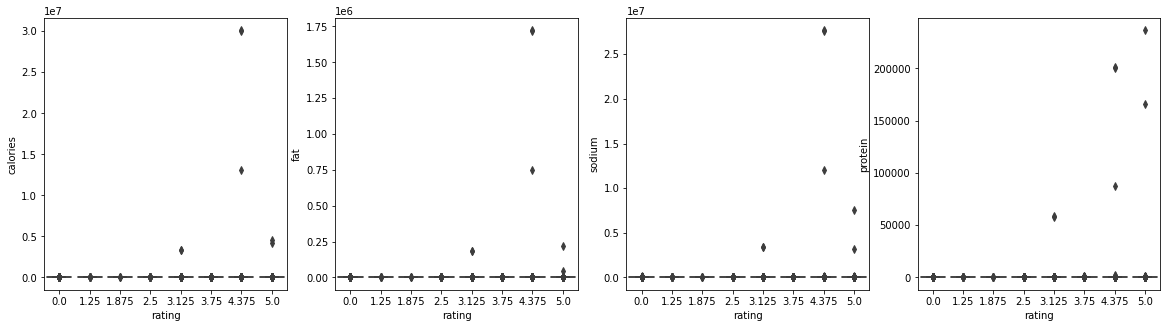

In [13]:
figure = plt.figure()
figure.set_figheight(5)
figure.set_figwidth(20)
figure.add_subplot(1, 4, 1)
sns.boxplot(x="rating", y="calories", data=receitas)
figure.add_subplot(1, 4, 2)
sns.boxplot(x="rating", y="fat", data=receitas)
figure.add_subplot(1, 4, 3)
sns.boxplot(x="rating", y="sodium", data=receitas)
figure.add_subplot(1, 4, 4)
sns.boxplot(x="rating", y="protein", data=receitas)
plt.show()

In [14]:
## retirando outliers
df = receitas[receitas.fat < receitas.fat.quantile(0.95)]
df = df[df.sodium < df.sodium.quantile(0.95)]


comentar sobre o tratamento dos dados dos outliers

In [15]:
df.shape

(13063, 11)

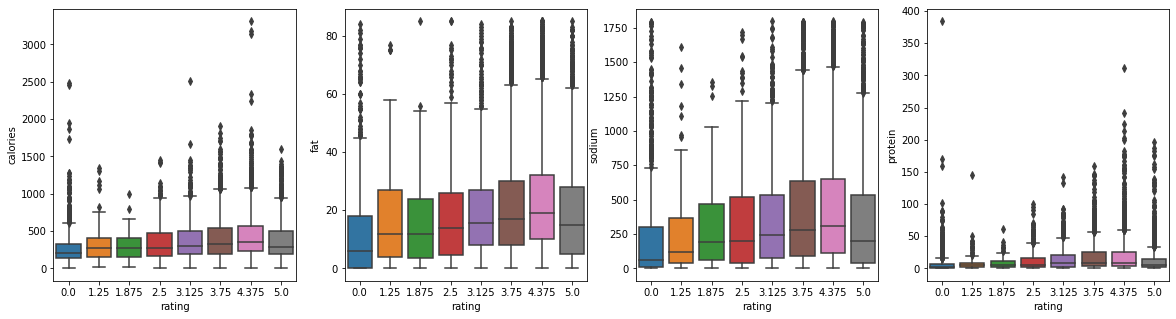

In [16]:
figure = plt.figure()
figure.set_figheight(5)
figure.set_figwidth(20)
figure.add_subplot(1, 4, 1)
sns.boxplot(x="rating", y="calories", data=df)
figure.add_subplot(1, 4, 2)
sns.boxplot(x="rating", y="fat", data=df)
figure.add_subplot(1, 4, 3)
sns.boxplot(x="rating", y="sodium", data=df)
figure.add_subplot(1, 4, 4)
sns.boxplot(x="rating", y="protein", data=df)
plt.show()

Inicialmente, os modelos sugeridos são modelos para encontrar relações entre as variáveis númericas (fat, calories, protein e sodium), de forma a serem variáveis de entrada para o modelo que determinará o rating (variável target do problema) 


Modelo: Regressão linear (Entre as variáveis de **Calories, Fat e Protein**). Dessa forma, pode-se predizer as variáveis a partir da existência de apenas uma variável.  
1. As variáveis **Fat, Protein e Calories** tem uma relação linear entre elas.

Modelo: K-means para determinar a quantidade de sódio em uma receita através da relação com as outras variáveis de **fat, calories e protein**. 

Nesse caso, o K-means seria bom para identificar clusters com características similires, uma vez que os dados apresentam "próximos" dos outros 


Modelo: Random Forest (Entre as variáveis de **Calories, Fat, Protein e Sodium**, tendo como target a variável **Rating**).

Nesse caso, poderiam ser utilizados decision tree (porém decision tree são comumente utilizados em problemas de classificação), SVM e KNN (custo operacional maior, por isso não utilizaria) 

Abaixo, segue um teste dos modelos sugeridos.
Não necessariamente os modelos sugeridos sejam os que melhor performem ao problema, mas seriam os iniciais para o desenvolvimento. 
No caso da determinação do rating por exemplo, pode se notar que a base é desbalanceada, sendo necessário realizar algum tratamento de balanceamento das bases (Oversample, Undersample, etc). 
        
        rating   quantidade
        4.375    5415
        3.750    3447
        5.000    1624
        0.000    1069
        3.125     982
        2.500     351
        1.250     101
        1.875      68

In [17]:
df_filtered = df[['rating', 'calories','fat','protein','sodium']]

In [18]:
df_filtered.corr()

,rating,calories,fat,protein,sodium
rating,1.000000,0.129547,0.152089,0.116079,0.120453
calories,0.129547,1.000000,0.837403,0.698108,0.457027
fat,0.152089,0.837403,1.000000,0.585026,0.411905
protein,0.116079,0.698108,0.585026,1.000000,0.511477
sodium,0.120453,0.457027,0.411905,0.511477,1.000000


In [19]:
df_filtered.rating.value_counts()

4.375    5415
3.750    3447
5.000    1624
0.000    1069
3.125     982
2.500     351
1.250     101
1.875      68
Name: rating, dtype: int64

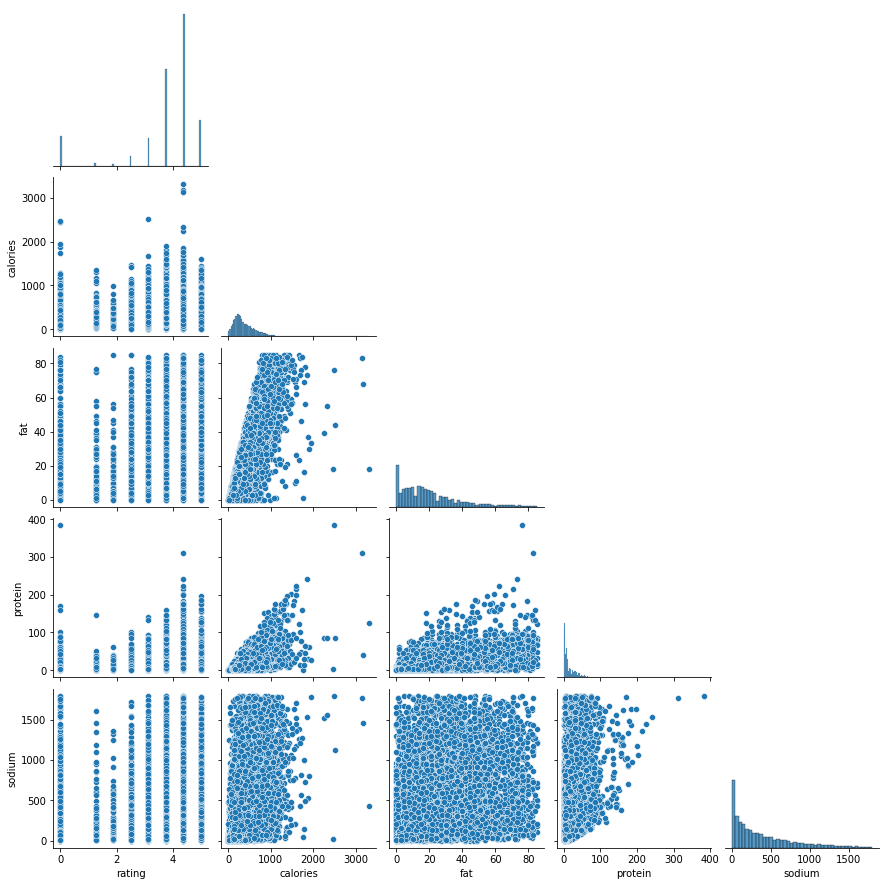

In [20]:
sns.pairplot(df_filtered, corner=True)

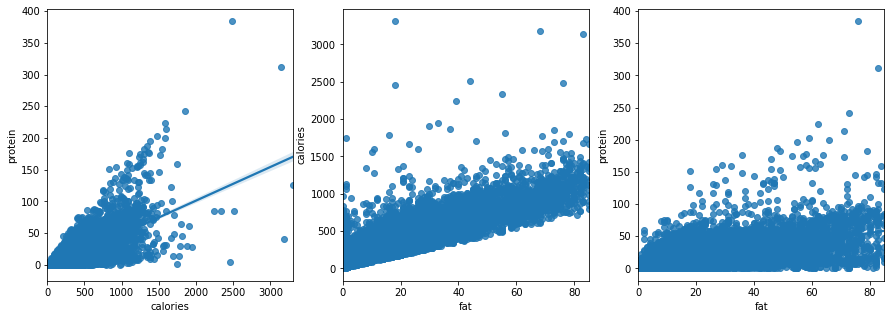

In [21]:
figure = plt.figure()
figure.set_figheight(5)
figure.set_figwidth(15)
figure.add_subplot(1, 3, 1)
sns.regplot(x="calories", y="protein", data=df_filtered, fit_reg= True)
figure.add_subplot(1, 3, 2)
sns.regplot(x="fat", y="calories", data=df_filtered, fit_reg= True)
figure.add_subplot(1, 3, 3)
sns.regplot(x="fat", y="protein", data=df_filtered, fit_reg= True)
plt.show()

##### Modelo: Regressão linear

In [22]:
## Nesse caso, para um teste inicial, utilizei a média como método de preenchimento de informações nulas 
df_teste_linear = df_filtered.fillna(df_filtered.mean())

In [23]:
X = df_teste_linear[['fat']]
y = df_teste_linear[['calories']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [25]:
linear = LinearRegression()
linear.fit(X_train, y_train)
pred = linear.predict(X_test)

In [26]:
print('RMSE: {:.2f}' .format(np.sqrt(mean_squared_error(y_test, pred))))
print('R2: {:.2f}' .format(r2_score(y_test, pred)))

RMSE: 148.47
R2: 0.70


## 2. Teste técnico

### a.) Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos.

i. métricas: precision, recall e F2-score;

ii. dados: classification_data.zip;

Observando os dados, utilizei a Regressão Logística como classificador. 

Os resultados obtidos foram:

Métricas: 

    Precisão: 0.82 (% True positive over sum of True positive and False positive)
    Recall: 0.85 (% True positive over sum of True positive and False negative)
    F2-Score: 0.82 (Weighted harmonic mean of precision and recall)

O modelo tem a precisão de 82% de acerto dos valores, 85% de encontrar os valores positivos. O F2-Sscore é a média harmônica entre as métricas encontradas, com peso de 50% do recall. 

Impacto das variáveis: 

    Variável X1, Score: 1.139
    Variável X2, Score: -3.278

Como as dimensões das variáveis X1 e X2 são similares, a variável com maior importância é a variável X2. Caso não fossem similares, seria necessário realizar uma normalização dos dados para encontrar a variável com maior importância. 



In [27]:
treino_a = pd.read_csv("classification_train.csv")
# treino_a.head()
teste_a = pd.read_csv("classification_test.csv")
# teste_a.head()

In [28]:
treino_a.target.value_counts(True)

1    0.50597
0    0.49403
Name: target, dtype: float64

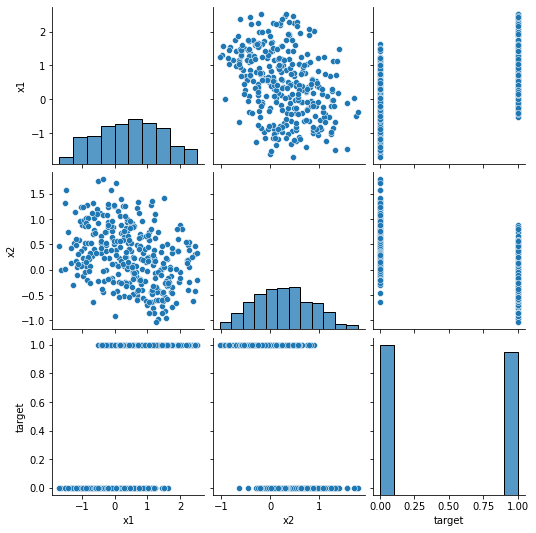

In [29]:
sns.pairplot(teste_a)

In [30]:
X_train = treino_a[['x1','x2']]
y_train = treino_a[['target']]
X_test = teste_a[['x1','x2']]
y_test = teste_a[['target']]

In [31]:
clinear = LogisticRegression()
clinear.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred = clinear.predict(X_test)

In [33]:
print(confusion_matrix(y_test, pred))

[[138  31]
 [ 24 137]]


In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       169
           1       0.82      0.85      0.83       161

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [35]:
print('Precisão: {:.2f}' .format(precision_score(y_test, pred)))
print('Recall: {:.2f}' .format(recall_score(y_test, pred)))
print('F2-Score: {:.2f}' .format(fbeta_score(y_test, pred,beta=0.5)))

Precisão: 0.82
Recall: 0.85
F2-Score: 0.82


In [36]:
importance = clinear.coef_[0]

for i,v in enumerate(importance):
	print('Variável X{}, Score: {:.3f}' .format(i+1,v))

Variável X1, Score: 1.139
Variável X2, Score: -3.278


### b.). Sugira o número de clusters ótimo a partir da análise dos dados.
i. métricas: elbow method, silhouette score, calinski-harabasz e
davies-bouldin;

ii. dados: clusterization_data.zip;

Utilizando os métodos sugeridos, temos que:

--> Elbow Method - Número de clusters ótimo = 2 ou 3

--> Silhouette score - Número de clusters ótimo = 2 

--> Calinski-Harabasz  - Número de clusters ótimo = 2 

--> Davies-Bouldin - Número de clusters ótimo = 2

Dessa forma, o número ótimo de clusters é igual a 2.


In [37]:
clusterization = pd.read_csv("clusterization.csv")

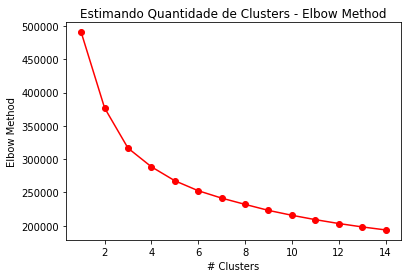

In [38]:
wcss = []
qtd_clus = []
for k in range( 1, 15 ):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(clusterization)
    wcss.append( kmeans.inertia_ )
    qtd_clus.append( k )

plt.plot(qtd_clus, wcss, 'ro-')
plt.title("Estimando Quantidade de Clusters - Elbow Method")
plt.xlabel("# Clusters")
plt.ylabel("Elbow Method")
plt.show()

Text(0, 0.5, 'Silhouette ')

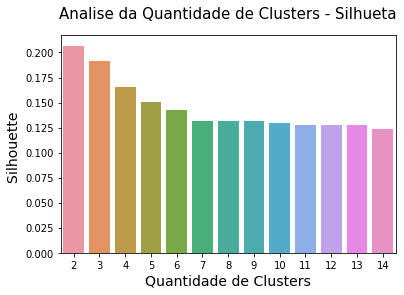

In [39]:
silcoef = []
qtd_clus = []

for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(clusterization)
    label = kmeans.labels_
    sil_coeff = silhouette_score(clusterization, label, metric='euclidean')
    silcoef.append(sil_coeff)
    qtd_clus.append(k)

pos_clus = max(enumerate(silcoef), key=(lambda x: x[1]))[0]  
qt_clus = qtd_clus[pos_clus]


df_coefsil = pd.DataFrame(silcoef, columns=['coefsil'])
df_clus = pd.DataFrame(qtd_clus, columns=['nclus'])
dfsil = df_coefsil.merge(df_clus, left_index=True, right_index=True, how = 'inner')    

ax = sns.barplot(x="nclus",y='coefsil', data=dfsil)
plt.title('Analise da Quantidade de Clusters - Silhueta', y=1.05, size=15)
plt.xlabel('Quantidade de Clusters', fontsize=14)
plt.ylabel('Silhouette ', fontsize=14) 

Text(0, 0.5, 'Calinski-Harabaz')

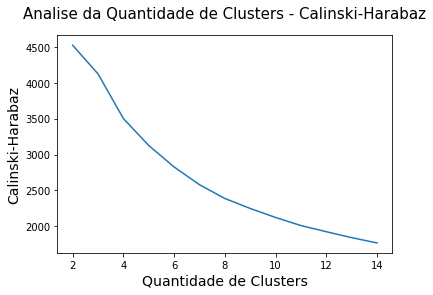

In [40]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(clusterization)
labels = kmeans_model.labels_
metrics.calinski_harabaz_score(clusterization, labels)
qtd_clus = []
calinski_harabaz = []
for k in range(2, 15):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(clusterization)
    labels = kmeans_model.labels_
    calinski_harabaz.append(metrics.calinski_harabaz_score(clusterization, labels))
    qtd_clus.append(k)
df_ch = pd.DataFrame(calinski_harabaz, columns=['calinski_harabaz'])
df_clus = pd.DataFrame(qtd_clus, columns=['nclus'])
dfch = df_ch.merge(df_clus, left_index=True, right_index=True, how = 'inner')  
ax = sns.lineplot(x="nclus",y='calinski_harabaz', data=dfch)
plt.title('Analise da Quantidade de Clusters - Calinski-Harabaz', y=1.05, size=15)
plt.xlabel('Quantidade de Clusters', fontsize=14)
plt.ylabel('Calinski-Harabaz', fontsize=14)


Text(0, 0.5, 'Davies Bouldin')

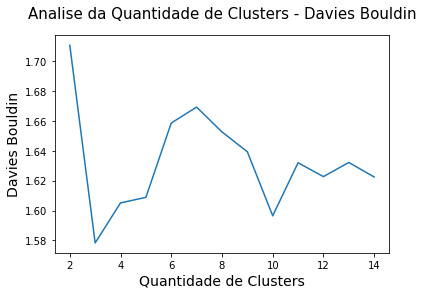

In [41]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(clusterization)
labels = kmeans_model.labels_
metrics.davies_bouldin_score(clusterization, labels)
qtd_clus = []
davies_bouldin = []
for k in range(2, 15):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(clusterization)
    labels = kmeans_model.labels_
    davies_bouldin.append(metrics.davies_bouldin_score(clusterization, labels))
    qtd_clus.append(k)
df_db = pd.DataFrame(davies_bouldin, columns=['davies_bouldin'])
df_clus = pd.DataFrame(qtd_clus, columns=['nclus'])
dfdb = df_db.merge(df_clus, left_index=True, right_index=True, how = 'inner')  
ax = sns.lineplot(x="nclus",y='davies_bouldin', data=dfdb)
plt.title('Analise da Quantidade de Clusters - Davies Bouldin', y=1.05, size=15)
plt.xlabel('Quantidade de Clusters', fontsize=14)
plt.ylabel('Davies Bouldin', fontsize=14)

### c.) Construa um regressor e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos.
i. métricas: RMSE, R2 e cor(target_observado, target_predito);

ii. dados: regression_data.zip.

Observando os dados, utilizei o RandomForestRegressor como regressor. 

Os resultados obtidos foram:

Métricas: 

    RMSE: 354.37
    R2: 0.89 
    corr: 0.94

Impacto das variáveis: 

    Variável X1, Importance: 0.038
    Variável X2, Importance: 0.681
    Variável X3, Importance: 0.011
    Variável X4, Importance: 0.014
    Variável X5, Importance: 0.005
    Variável X6, Importance: 0.003
    Variável X7, Importance: 0.248

Utilizando o feature importance, a variável com maior importância é a variável X2 e em segundo lugar a variável X7. 

In [42]:
treino_c = pd.read_csv("regression_train.csv")
# treino_a.head()
teste_c = pd.read_csv("regression_test.csv")
# teste_a.head()

In [43]:
treino_c.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [54]:
treino_c.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,1349.940229,2.421925,-0.460781,52.094329,2.462871,-65.284233,4.381958,-1.287435
std,1319.454253,3.182976,4.402838,31.374828,2.541632,9.033489,3.290306,11.066380
min,0.062551,-8.699406,-13.651540,38.035456,0.002360,-121.450423,0.000000,-69.835905
25%,443.298641,0.170590,-3.263568,47.087106,0.671196,-69.126630,0.000000,-7.830007
50%,1349.940229,2.508671,-0.460781,49.972867,1.652609,-65.360660,5.000000,-1.074191
75%,1349.940229,4.540218,2.370445,52.674305,3.361181,-61.187635,8.000000,5.659476
max,10382.469480,12.380693,12.926106,500.000000,18.813009,53.919202,8.000000,30.376348


In [44]:
## Nesse caso, para um teste inicial, utilizei a média como método de preenchimento de informações nulas 
treino_c.fillna(treino_c.mean(), inplace=True)
teste_c.fillna(teste_c.mean(), inplace=True)

In [45]:
X_train = treino_c.drop(columns = 'target')
y_train = treino_c[['target']]
X_test = teste_c.drop(columns = 'target')
y_test = teste_c[['target']]

In [46]:
# sns.pairplot(treino_c)

In [47]:
rforest_c = RandomForestRegressor()
rforest_c.fit(X_train, y_train)
pred = rforest_c.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [48]:
print('RMSE: {:.2f}' .format(np.sqrt(mean_squared_error(y_test, pred))))
print('R2: {:.2f}' .format(r2_score(y_test, pred)))

RMSE: 361.88
R2: 0.88


In [49]:
y_test['pred'] = pred
y_test.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,target,pred
target,1.000000,0.942472
pred,0.942472,1.000000


In [51]:
k = 1
for i in rforest_c.feature_importances_:
  print('Variável X{}, Importance: {:.3f}' .format(k,i))
  k = k+1

Variável X1, Importance: 0.038
Variável X2, Importance: 0.616
Variável X3, Importance: 0.012
Variável X4, Importance: 0.014
Variável X5, Importance: 0.004
Variável X6, Importance: 0.004
Variável X7, Importance: 0.312
